In [95]:
#导入D:\library\Github\Innovative-practice\第三学期\绘图\datapred_bp.h5
#导入D:\library\Github\Innovative-practice\第三学期\绘图\datapred_lstm.h5
import h5py
import numpy as np
import pandas as pd
f = h5py.File('D:\library\Github\Innovative-practice\第三学期\绘图/datapred_bp.h5', 'r')
datapred_bp = f['data']
datapred_bp  = np.array(datapred_bp)
f.close()
f = h5py.File('D:\library\Github\Innovative-practice\第三学期\绘图/datapred_lstm.h5', 'r')
datapred_lstm = f['testPredict']
testY=f['testY']
datapred_lstm  = np.array(datapred_lstm)
testY=np.array(testY)
f.close()
#读取D:\library\Github\Innovative-practice\第三学期\绘图\datapred_cnn.h5
f = h5py.File('D:\library\Github\Innovative-practice\第三学期\绘图/datapred_cnn.h5', 'r')
datapred_cnn = f['data']
datapred_cnn  = np.array(datapred_cnn)
f.close()
'''f=h5py.File(f'D:\library\Github\Innovative-practice\第三学期\convlstm\preddata\\testpred400_sms0.7.h5', 'r')
datapred_convlstm=f['data']
datapred_convlstm=datapred_convlstm[:,40:60,40:60,:]
datapred_convlstm=np.array(datapred_convlstm)
f.close()'''
#读取D:\library\Github\Innovative-practice\第三学期\绘图\datapred_arima.csv

datapred_arima=pd.read_csv('D:\library\Github\Innovative-practice\第三学期\绘图/datapred_arima.csv')
#转为numpy
datapred_arima=np.array(datapred_arima)



In [96]:
print(datapred_bp.shape)
print(datapred_lstm.shape)
print(datapred_cnn.shape)
datapred_cnn=datapred_cnn[378:501]
print(datapred_cnn.shape)
datapred_arima=datapred_arima[300:]
print(datapred_arima.shape)
print(datapred_convlstm.shape)

(169199, 1)
(169200, 1)
(512, 1)
(123, 1)
(123, 1)
(422, 20, 20, 1)


In [97]:
i=16
#整除16
i_x=i//16
i_y=i%20

NameError: name 'x_axis_data' is not defined

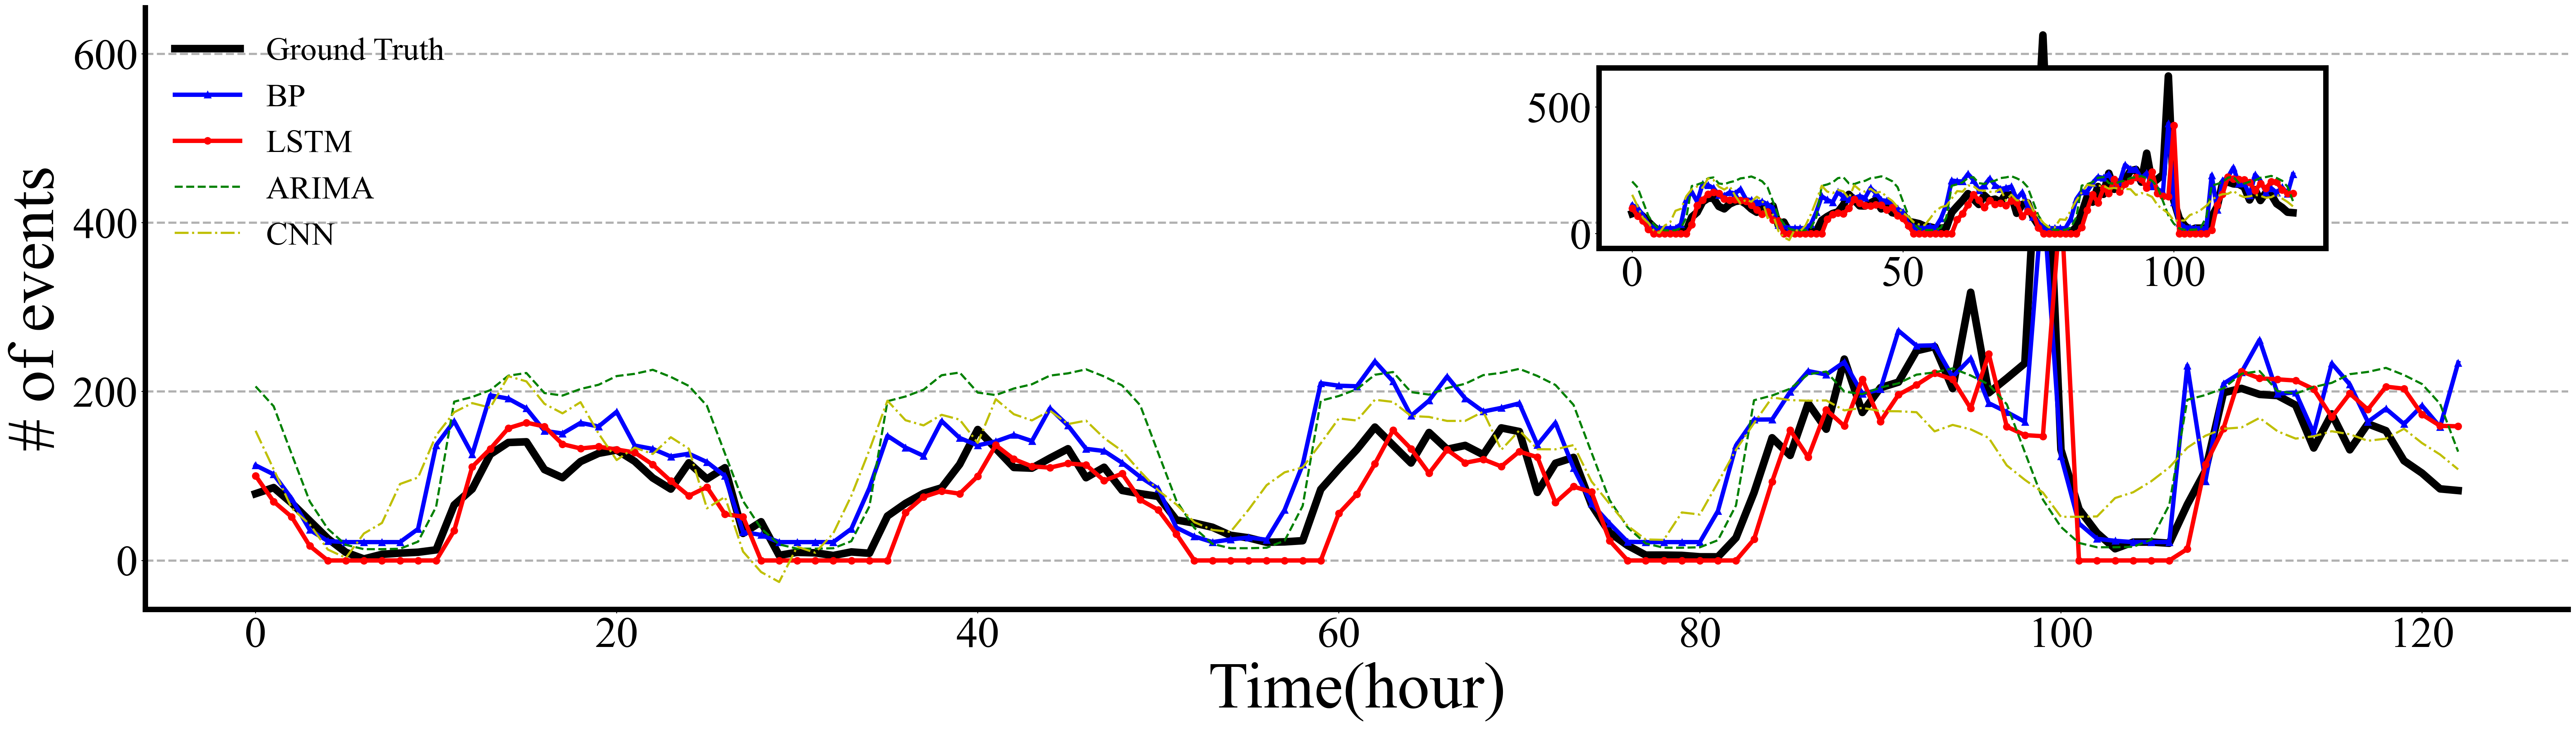

In [98]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time(hour)', fontsize=60,labelpad=5)
ax.set_ylabel('# of events', fontsize=60,labelpad=5)
ax.plot(testY[(i*423+300):(i+1)*423],'black',label='Ground Truth',linewidth=7)
ax.plot(datapred_bp[(i*423+300):(i+1)*423]/10118,'b^-',label='BP',linewidth=4)
ax.plot(datapred_lstm[(i*423+300):(i+1)*423],'ro-',label='LSTM',linewidth=4)
ax.plot(datapred_arima,'g--',label='ARIMA',linewidth=2)
ax.plot(datapred_cnn,'y-.',label='CNN',linewidth=2)
#ax.plot(datapred_convlstm[:,i_x,i_y,:]*10119,label='ConvLSTM',color='purple')
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)


#在中上位置绘制局部图
axins = ax.inset_axes([0.6, 0.6, 0.3, 0.3])


# 在缩放图中也绘制主图所有内容，然后根据限制横纵坐标来达成局部显示的目的
axins.plot(testY[(i*423+300):(i+1)*423],'black',label='Ground Truth',linewidth=7)
axins.plot(datapred_bp[(i*423+300):(i+1)*423]/10118,'b^-',label='BP',linewidth=4)
axins.plot(datapred_lstm[(i*423+300):(i+1)*423],'ro-',label='LSTM',linewidth=4)
axins.plot(datapred_arima,'g--',label='ARIMA',linewidth=2)
axins.plot(datapred_cnn,'y-.',label='CNN',linewidth=2)
zone_left = 80  
zone_right = 98
 # 坐标轴的扩展比例（根据实际数据调整） 
x_ratio = 0.05  # x轴显示范围的扩展比例  
y_ratio = 0.05  # y轴显示范围的扩展比例     
xlim0=# x轴的显示范围 
xlim1 = x_axis_data[zone_right]+(x_axis_data[zone_right]-x_axis_data[zone_left])*x_ratio    # y轴的显示范围  

y = np.hstack((data1[zone_left:zone_right], data2[zone_left:zone_right]))  
ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio  
ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio    # 调整子坐标系的显示范围 
axins.set_xlim(xlim0, xlim1)  
axins.set_ylim(ylim0, ylim1)  



NameError: name '真实值' is not defined

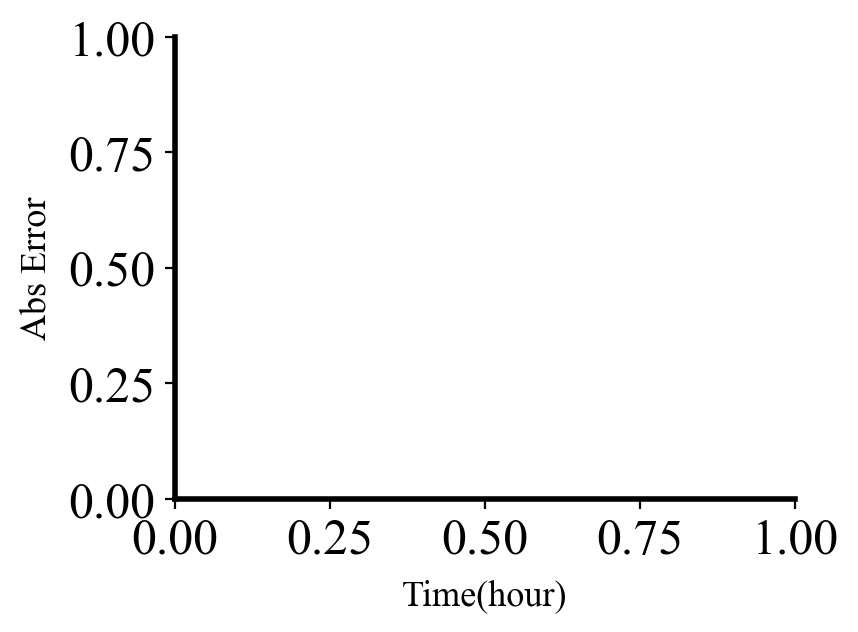

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
# 可视化绘制
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time(hour)', fontsize=13,labelpad=5)
ax.set_ylabel('Abs Error', fontsize=13,labelpad=5)
data=(真实值-预测值)
#data转换为一维数组
#data=data.reshape(1,-1)[0]
#绘制误差条形图
ax.bar(range(423),data)
ax.legend(fontsize=10,loc='upper left',frameon=False)